In [1]:
# project: p2
# submitter: lin364
# partner: none
# hours: 12
from loans import Bank
from time import time
import pandas as pd
from search import BST


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#q1
home = Bank('First Home Bank')
sum_inter_rate = 0
bank_loans = home.loans_lib
bank_loans_num = 0
for loan in bank_loans:
    temp_inter_rate = loan.interest_rate
    if temp_inter_rate > 0:
        sum_inter_rate += temp_inter_rate
        bank_loans_num += 1
sum_inter_rate / bank_loans_num


2.962962962962963

In [4]:
#q2
average = 0.0
sum_appli = 0

for loan in bank_loans:
    appli_num = len(loan.applicants)
    sum_appli += appli_num
sum_appli / len(bank_loans)

1.5777777777777777

In [5]:
#q3
distr = {}
for loan in bank_loans:
    for applicant in loan.applicants:
        try:
            distr[applicant.age] += 1
        except KeyError:
            distr[applicant.age] = 1
distr
        

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [6]:
#q4
loan_tree = BST()
for loan in bank_loans:
    loan_tree.add(loan.interest_rate, loan)
len(loan_tree[-1])

18

In [7]:
#q5
def bst_height(root):
    if root is None:
        return 0
    return 1 + max(bst_height(root.left), bst_height(root.right))
 
bst_height(loan_tree.root)

9

<AxesSubplot:xlabel='BST Adds', ylabel='Total Elapsed Milliseconds'>

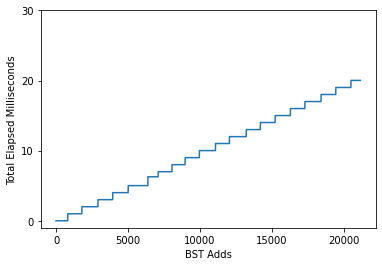

In [8]:
#q6
uw = Bank('University of Wisconsin Credit Union')
uw_loans = uw.loans_lib
uw_tree = BST()

adds, times = [], []
index = 0
acc = 0
start = time()
for loan in uw_loans:
    index += 1
    uw_tree.add(loan.interest_rate,loan)
    end = time()
    elapsed = end - start
    start = end
    acc += elapsed * 1000
    times.append(acc)
    adds.append(index)

df = pd.DataFrame({'BST Adds': adds,'Total Elapsed Milliseconds':times})
df.plot.line(x='BST Adds',y='Total Elapsed Milliseconds',ylabel='Total Elapsed Milliseconds', yticks=[0, 10, 20, 30], legend=False)

<AxesSubplot:ylabel='Milliseconds'>

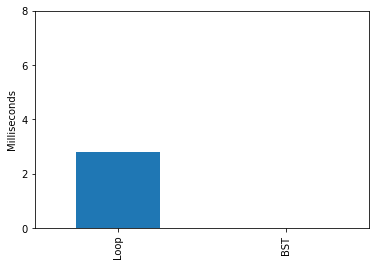

In [9]:
#q7
counter = 0
start = time()
for loan in uw_loans:
    if loan.interest_rate == -1:
        counter += 1
end = time()
loop_interval = end - start

start = time()
counter = uw_loans[-1]
end = time()
tree_interval = end - start
df = pd.DataFrame([ loop_interval * 1000,  tree_interval * 1000], index=['Loop','BST'])
df.plot.bar(ylabel='Milliseconds', yticks=[0, 2, 4, 6, 8], legend=False)

    

<AxesSubplot:xlabel='value', ylabel='amount'>

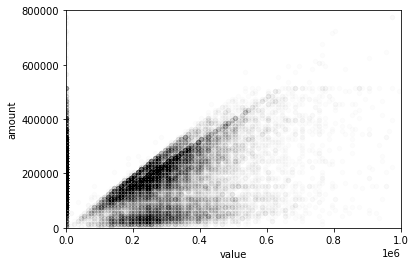

In [10]:
#q8
property_values = []
loan_amounts = []

for loan in uw_loans:
    if (loan.property_value <= 1e6):
        property_values.append(loan.property_value)
        loan_amounts.append(loan.loan_amount)

df = pd.DataFrame({'Property Values':property_values, 'Loan Amounts':loan_amounts})
ytick = [i * 200000 for i in range(0,5)]
xtick = [i * 1e5 for i in range(0,11,2)]
df.plot.scatter(x='Property Values', y='Loan Amounts',xlim=(0, 1e6), ylim=(0,800000), color='black',alpha=0.01, xticks=xtick, yticks=ytick, xlabel='value',ylabel='amount')



<AxesSubplot:ylabel='Number of Applicants'>

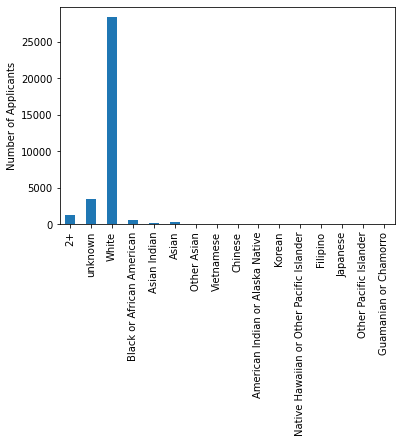

In [11]:
#q9
data = {'2+': 0, 'unknown': 0}

for loan in uw_loans:
    for applicant in loan.applicants:
        races = applicant.race
        if len(races) == 0:
            data['unknown'] += 1
        elif len(races) == 1:
            for race in races:
                if race not in data:
                    data[race] = 1
                else:
                    data[race] += 1
        else: # >=2
            data['2+'] += 1

df = pd.DataFrame( list(data.values()), index=list(data.keys()))
df.plot.bar(ylabel='Number of Applicants', legend=False)

In [1]:
#q10
def count_nodes(root):
    if (root == None):
        return 0
    if (root.left == None and root.right == None):
        return 1
    return 1+count_nodes(root.left)+count_nodes(root.right)
count_nodes(uw_tree.root)

NameError: name 'uw_tree' is not defined

In [3]:
import time

time.time()

1646367869.113888